In [1]:
import sys
print(f'This notebook was last run with this kernel {sys.executable}')

This notebook was last run with this kernel /home/igarzonalva/.conda/envs/cell2cell/bin/python


In [2]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import tempfile
import os
import requests
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import anndata as ad
import subprocess
import hashlib

os.chdir('/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/01_Preprocessing')

In [3]:
print(f'Scanpy Version: {sc.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')

Scanpy Version: 1.10.4
Pandas Version: 2.2.3
Numpy version: 1.26.4


In [4]:
metadata = pd.read_csv("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/01_Preprocessing/meta_of_interest.txt", sep = "\t")

In [5]:
metadata

,geo_accession,gender,cancer_type,cell_population,barcodes_file,matrix_file,features_file
0,GSM4909281,Female,TNBC,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
1,GSM4909282,Female,TNBC,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
2,GSM4909283,Female,TNBC,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
3,GSM4909284,Female,TNBC,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
4,GSM4909285,Female,TNBC_BRCA,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
5,GSM4909286,Female,TNBC_BRCA,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
6,GSM4909287,Female,TNBC_BRCA,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
7,GSM4909288,Female,TNBC_BRCA,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
8,GSM4909289,Female,HER2,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...
9,GSM4909290,Female,HER2,Total,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4909...,https://ftp.ncbi.nlm.nih.gov/geo/series/GSE161...


In [6]:
adata_dict = {}

for index, row in metadata.iterrows():
    ftp_files = []
    
    ftp_files.append(row.barcodes_file)
    ftp_files.append(row.matrix_file)
    ftp_files.append(row.features_file)

    sample_name = row.geo_accession
    cancer_type = row.cancer_type


    with tempfile.TemporaryDirectory() as tmpdir:
        local_paths = []
        
        for url in ftp_files:
            elem = os.path.basename(url)
            
            if 'matrix.mtx.gz' in elem:
                filename = 'matrix.mtx.gz'
            elif 'barcodes.tsv.gz' in elem:
                filename = 'barcodes.tsv.gz'
            elif 'features.tsv.gz' in elem:
                filename = 'features.tsv.gz'
            else:
                raise ValueError(f"Unrecognized 10x file type in {elem}")
            
            local_path = os.path.join(tmpdir, filename)
             
            subprocess.run(["wget", "-q", "-O", local_path, url], check=True)
           
            local_paths.append(local_path)
        
        adata_dict[sample_name] = sc.read_10x_mtx(tmpdir)
        adata_dict[sample_name].obs['batch'] = sample_name
        adata_dict[sample_name].obs['subtype'] = cancer_type

In [7]:
adata_dict

{'GSM4909281': AnnData object with n_obs × n_vars = 3666 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909282': AnnData object with n_obs × n_vars = 15870 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909283': AnnData object with n_obs × n_vars = 1065 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909284': AnnData object with n_obs × n_vars = 2015 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909285': AnnData object with n_obs × n_vars = 5581 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909286': AnnData object with n_obs × n_vars = 6456 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909287': AnnData object with n_obs × n_vars = 9593 × 33538
     obs: 'batch', 'subtype'
     var: 'gene_ids', 'feature_types',
 'GSM4909288': AnnData object with n_obs × n_vars = 21130 × 33538
  

In [9]:
with open("unprocessed_adata_dict.pkl", "wb") as f:
    pickle.dump(adata_dict, f)

In [43]:
with open("unprocessed_adata_dict.pkl", "rb") as f:
    adata_dict = pickle.load(f)

# Calculate QC Metrics

In [10]:
for ad in adata_dict.values():
    ad.var['mt'] = ad.var_names.str.match('^MT-')

In [12]:
for ad in adata_dict.values():
    sc.pp.calculate_qc_metrics(ad, qc_vars=['mt'], log1p=True, inplace=True)

In [13]:
for ad in adata_dict.values():
    ad.obs['complexity'] = ad.obs.total_counts / ad.obs.n_genes_by_counts

In [14]:
adata_dict

{'GSM4909281': AnnData object with n_obs × n_vars = 3666 × 33538
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 'GSM4909282': AnnData object with n_obs × n_vars = 15870 × 33538
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts

# Plot Initial QC Metrics

In [15]:
rows_list = []
for sam, ad in adata_dict.items():
    row_df = pd.DataFrame({"genes_with_pos_counts": ad.obs.n_genes_by_counts, 
                           "counts_per_cell": ad.obs.total_counts, 
                           "pct_counts_mt":ad.obs.pct_counts_mt,
                           "complexity":ad.obs.complexity,
                          "sample": sam})
    rows_list.append(row_df)
df = pd.concat(rows_list, ignore_index=True)

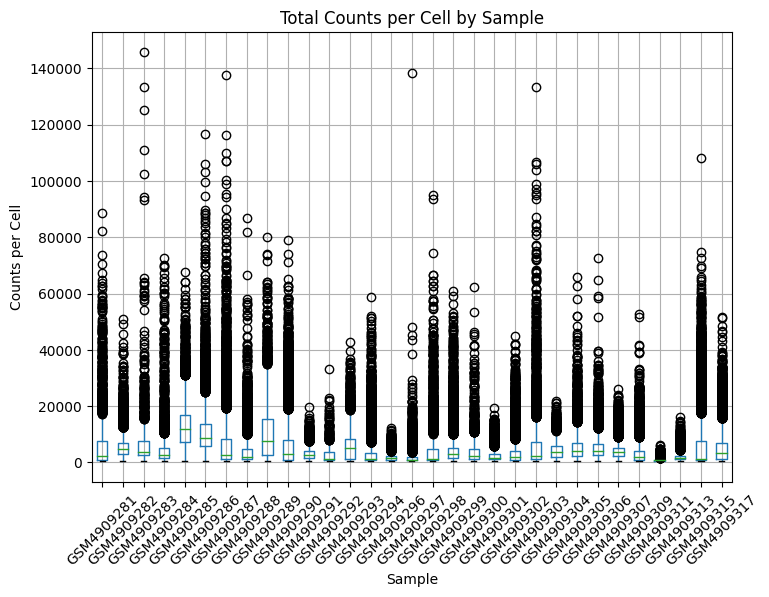

In [16]:
ax = df.boxplot(column="counts_per_cell", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Total Counts per Cell by Sample")
ax.set_xlabel("Sample")
ax.set_ylabel("Counts per Cell")
plt.suptitle("")  
plt.show()

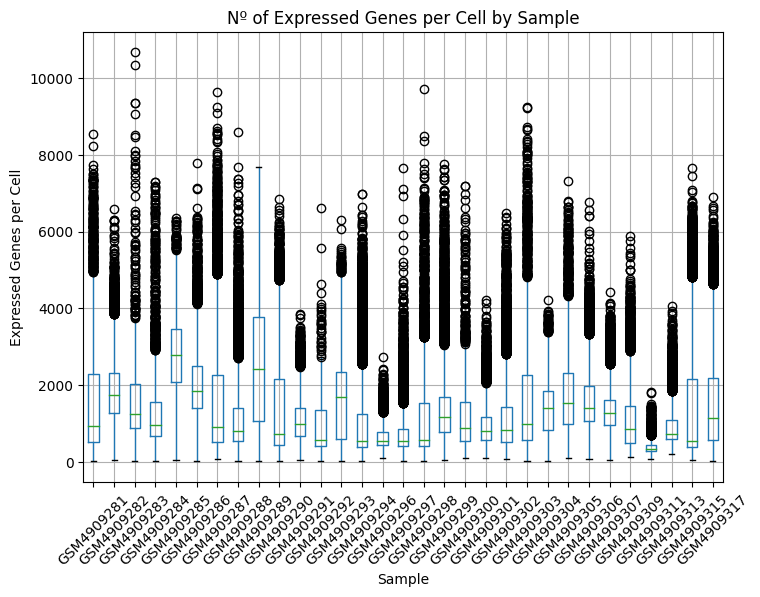

In [17]:
ax = df.boxplot(column="genes_with_pos_counts", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Nº of Expressed Genes per Cell by Sample")
ax.set_xlabel("Sample")
ax.set_ylabel("Expressed Genes per Cell")
plt.suptitle("")  
plt.show()

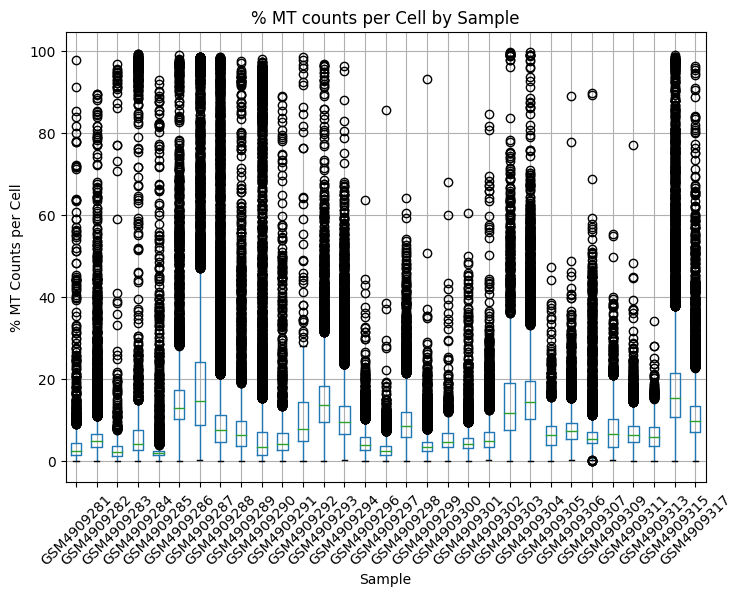

In [18]:
ax = df.boxplot(column="pct_counts_mt", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("% MT counts per Cell by Sample")
ax.set_xlabel("Sample")
ax.set_ylabel("% MT Counts per Cell")
plt.suptitle("")  
plt.show()

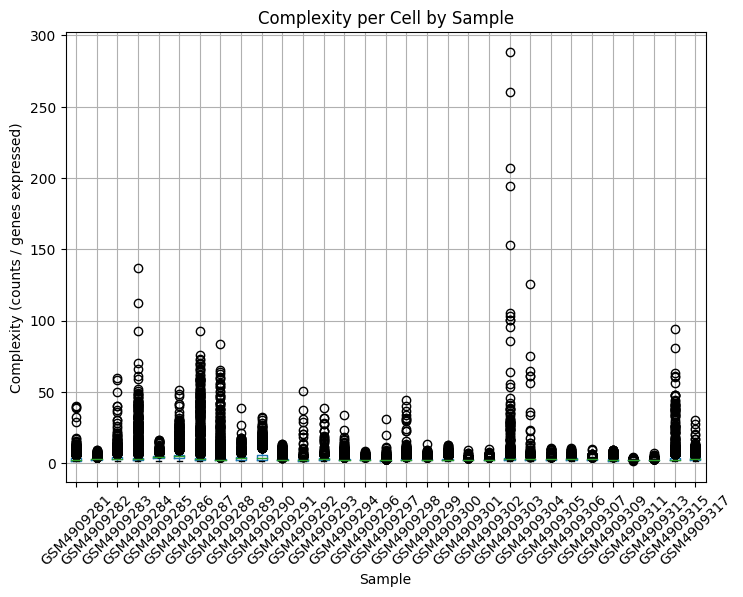

In [19]:
ax = df.boxplot(column="complexity", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Complexity per Cell by Sample")
ax.set_xlabel("Sample")
ax.set_ylabel("Complexity (counts / genes expressed)")
plt.suptitle("")  
plt.show()

# CELL FILTERING

For the lower tresholds, set a general value, if the 1th percentile is more stringent (higher), use that one. 
if the sample treshold is lower, use the general
if the sample treshold is higher, use the sample specific


For the upper tresholds, set a general value, if the 99th percentile is more stringent (lower), use that one. 
if the sample treshold is higher, use the general
if the sample treshold is lower (more stringent), use the sample specific



In [20]:
n_cells = 0
for ad in adata_dict.values():
    n_cells += len(ad.obs_names)
print(f'Filtering starts with {n_cells} total cells')

Filtering starts with 227059 total cells


In [21]:
for name, ad in adata_dict.items():

    # GENES LOWER
    genes_lower_treshold = 300
    sample_genes_lower_treshold = np.quantile(ad.obs.n_genes_by_counts,0.01)
    filtering_genes_lower_treshold = max(sample_genes_lower_treshold,genes_lower_treshold)
    sc.pp.filter_cells(ad, min_genes = filtering_genes_lower_treshold, inplace = True)

    # COUNTS LOWER
    counts_lower_treshold = 500
    sample_counts_lower_treshold =np.quantile(ad.obs.total_counts,0.01)
    filtering_counts_lower_treshold = max(sample_counts_lower_treshold, counts_lower_treshold)
    sc.pp.filter_cells(ad, min_counts = filtering_counts_lower_treshold, inplace = True)
    
    # GENES UPPER
    genes_upper_treshold = 6000
    sample_genes_upper_treshold = np.quantile(ad.obs.n_genes_by_counts,0.99)
    filtering_genes_upper_treshold = min(sample_genes_upper_treshold,genes_upper_treshold)
    sc.pp.filter_cells(ad, max_genes = filtering_genes_upper_treshold, inplace = True) 
    
    # COUNTS UPPER
    counts_upper_treshold = 50000
    sample_counts_upper_treshold = np.quantile(ad.obs.total_counts,0.99)
    filtering_counts_upper_treshold = min(sample_counts_upper_treshold, counts_upper_treshold)
    sc.pp.filter_cells(ad, max_counts = filtering_counts_upper_treshold, inplace = True)

    # MT PERCENTAGE 
    mt_max_allowed = 40
    sample_mt_upper_quantile = np.quantile(ad.obs.pct_counts_mt,0.99)
    filtering_mt_upper_treshold = min(mt_max_allowed,sample_mt_upper_quantile)
    ad_mt_fil = ad[ad.obs.pct_counts_mt <= filtering_mt_upper_treshold,:].copy()
    adata_dict[name] = ad_mt_fil

In [22]:
for sample, ad in adata_dict.items():
    if any(ad.obs.complexity < 0.8):
        print(f'Sample {sample} has some cell with complexity below 0.8')

In [23]:
n_cells = 0
for ad in adata_dict.values():
    n_cells += len(ad.obs_names)
print(f'After cell filtering {n_cells} remain')

After cell filtering 207973 remain


# Plot QC metrics After cell filtering

In [24]:
rows_list_post = []
for sam, ad in adata_dict.items():
    row_df_post = pd.DataFrame({"genes_with_pos_counts": ad.obs.n_genes_by_counts, 
                           "counts_per_cell": ad.obs.total_counts, 
                           "pct_counts_mt":ad.obs.pct_counts_mt,
                          "sample": sam})
    rows_list_post.append(row_df_post)
df_post = pd.concat(rows_list_post, ignore_index=True)

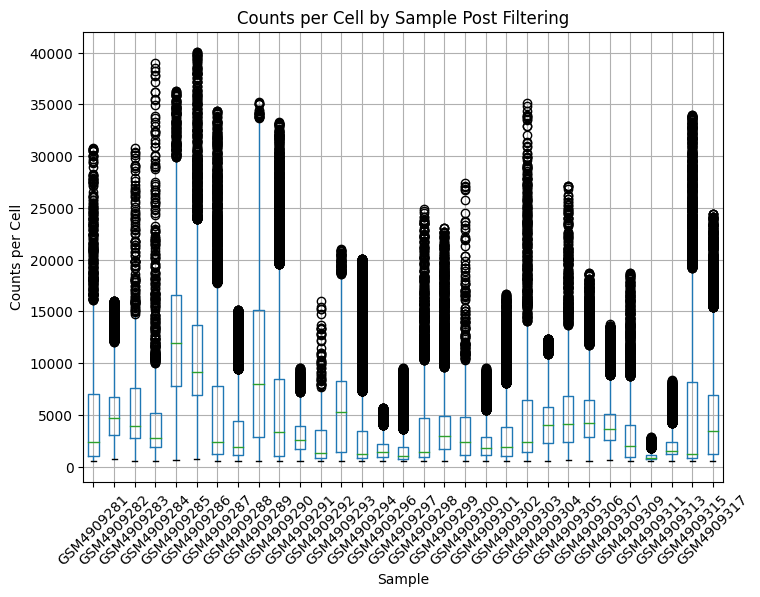

In [25]:
ax = df_post.boxplot(column="counts_per_cell", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Counts per Cell by Sample Post Filtering")
ax.set_xlabel("Sample")
ax.set_ylabel("Counts per Cell")
plt.suptitle("")  
plt.show()

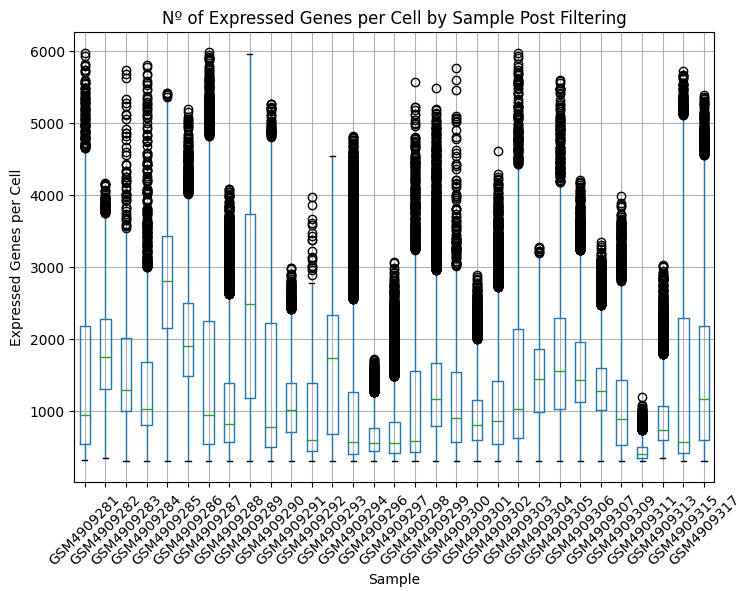

In [26]:
ax = df_post.boxplot(column="genes_with_pos_counts", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Nº of Expressed Genes per Cell by Sample Post Filtering")
ax.set_xlabel("Sample")
ax.set_ylabel("Expressed Genes per Cell")
plt.suptitle("")  
plt.show()

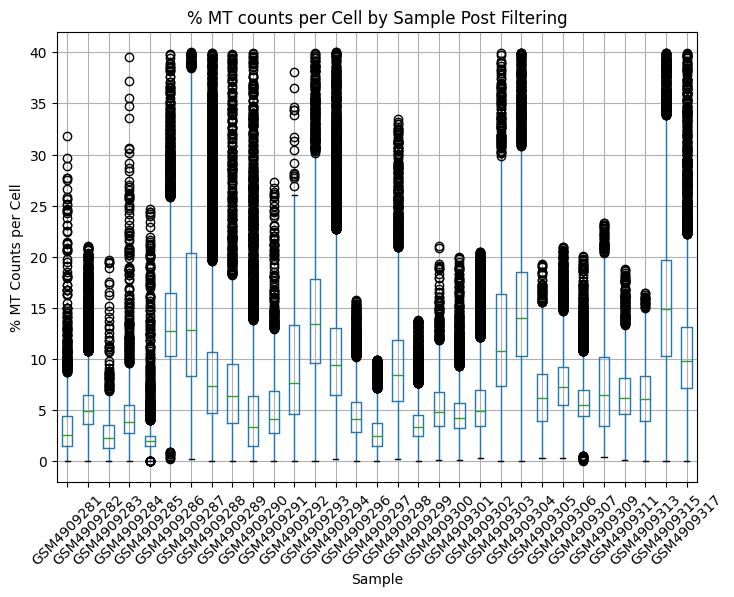

In [27]:
ax = df_post.boxplot(column="pct_counts_mt", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("% MT counts per Cell by Sample Post Filtering")
ax.set_xlabel("Sample")
ax.set_ylabel("% MT Counts per Cell")
plt.suptitle("")  
plt.show()

# CELL TYPIST ANNOTATION 

CellTypist accepts the input data as a count table (cell-by-gene or gene-by-cell) in the format of .txt, .csv, .tsv, .tab, .mtx or .mtx.gz. A raw count matrix (reads or UMIs) is required. Non-expressed genes (if you are sure of their expression absence in your data) are suggested to be included in the input table as well, as they point to the negative transcriptomic signatures when compared with the model used.

In [60]:
# !pip install celltypist

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached igraph-0.11.8-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 6.4 MB/s eta 0:00:009.3 MB/s eta 0:00:01
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
Using cached igraph-0.11.8-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)


In [28]:
import celltypist
from celltypist import models
print(f'Celltypist version: {celltypist.__version__}')

Celltypist version: 1.6.3


In [29]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/igarzonalva/.celltypist/data/models
💾 Downloading model [1/54]: Immune_All_Low.pkl
💾 Downloading model [2/54]: Immune_All_High.pkl
💾 Downloading model [3/54]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/54]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/54]: Adult_Human_MTG.pkl
💾 Downloading model [6/54]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/54]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/54]: Adult_Human_Skin.pkl
💾 Downloading model [9/54]: Adult_Human_Vascular.pkl
💾 Downloading model [10/54]: Adult_Mouse_Gut.pkl
💾 Downloading model [11/54]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [12/54]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [13/54]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [14/54]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [15/54]: COVID19_HumanChallenge_B

In [30]:
model = models.Model.load(model = 'Immune_All_High.pkl')
model.cell_types

array(['B cells', 'B-cell lineage', 'Cycling cells', 'DC', 'DC precursor',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ETP',
       'Early MK', 'Endothelial cells', 'Epithelial cells',
       'Erythrocytes', 'Erythroid', 'Fibroblasts', 'Granulocytes',
       'HSC/MPP', 'ILC', 'ILC precursor', 'MNP', 'Macrophages',
       'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocytes/platelets', 'Mono-mac', 'Monocyte precursor',
       'Monocytes', 'Myelocytes', 'Plasma cells', 'Promyelocytes',
       'T cells', 'pDC', 'pDC precursor'], dtype=object)

In [31]:
import copy
adata_dict_annotation = copy.deepcopy(adata_dict) 
adata_dict_annotation

{'GSM4909281': AnnData object with n_obs × n_vars = 3401 × 33538
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 'GSM4909282': AnnData object with n_obs × n_vars = 15096 × 33538
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts'
     var: 'gene_ids', 'feature_t

In [32]:
for ad in adata_dict_annotation.values():
    sc.pp.normalize_total(ad, target_sum = 10000)
    sc.pp.log1p(ad)    

In [33]:
immune_All_High_prediction_dict = {}
for name, ad in adata_dict_annotation.items():
    immune_All_High_prediction_dict[name] = celltypist.annotate(ad, model = 'Immune_All_High.pkl', 
                                                               majority_voting = True, 
                                                               mode = 'prob match', p_thres = 0.8) # everything below 0.8 labbeled as unkown

🔬 Input data has 3401 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 5967 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 15096 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 5967 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 943 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 5967 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct o

In [34]:
with open("celltypist_dict.pkl", "wb") as f:
    pickle.dump(immune_All_High_prediction_dict, f)

In [35]:
for name, ad in adata_dict.items():
    df_predictions = immune_All_High_prediction_dict[name].predicted_labels.reindex(ad.obs_names)
    ad.obs = pd.concat([ad.obs, df_predictions], axis=1)

In [36]:
adata_dict

{'GSM4909281': AnnData object with n_obs × n_vars = 3401 × 33538
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 'GSM4909282': AnnData object with n_obs × n_vars = 15096 × 33538
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexit

# Filter non-expressed genes

In [37]:
for ad in adata_dict.values():
    ad.raw = ad.copy() # save all genes before removing any 
    sc.pp.filter_genes(ad, min_counts = 5, inplace=True)
    sc.pp.filter_genes(ad, min_cells = 10, inplace=True)

# Plot Gene level QC metrics to check filtering

In [38]:
rows_list_post = []
for sam, ad in adata_dict.items():
    row_df_post = pd.DataFrame({"cells_by_counts": ad.var.n_cells_by_counts, 
                           "counts": ad.var.total_counts, 
                          "sample": sam})
    rows_list_post.append(row_df_post)
df_post = pd.concat(rows_list_post, ignore_index=True)

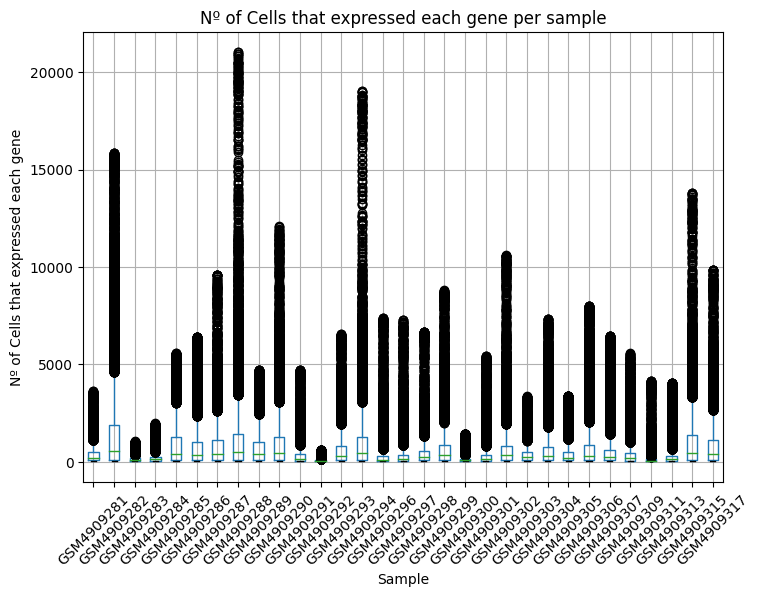

In [39]:
ax = df_post.boxplot(column="cells_by_counts", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Nº of Cells that expressed each gene per sample")
ax.set_xlabel("Sample")
ax.set_ylabel("Nº of Cells that expressed each gene")
plt.suptitle("")  
plt.show()

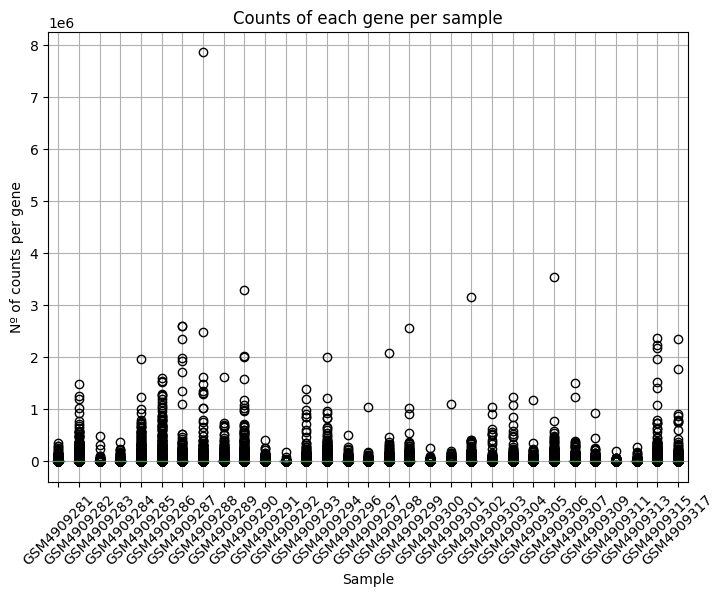

In [40]:
ax = df_post.boxplot(column="counts", by="sample", figsize=(8, 6), rot = 45)
ax.set_title("Counts of each gene per sample")
ax.set_xlabel("Sample")
ax.set_ylabel("Nº of counts per gene")
plt.suptitle("")  
plt.show()

In [41]:
with open("before_scrublet_adata_dict.pkl", "wb") as f:
    pickle.dump(adata_dict, f)

In [43]:
with open("before_scrublet_adata_dict.pkl", "rb") as f:
    adata_dict = pickle.load(f)

# Doublet Removal

Predict cell doublets using a nearest-neighbor classifier of observed transcriptomes and simulated doublets. Works best if the input is a raw
(unnormalized) counts matrix from a single sample or a collection of similar samples from the same experiment.

src/scanpy/preprocessing/_scrublet/__init__.py

In [5]:
#!pip install scikit-image

  Using cached imageio-2.36.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 8.0 MB/s eta 0:00:000m eta 0:00:010:00:01
Using cached imageio-2.36.1-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)


In [44]:
for ad in adata_dict.values():

    sc.pp.scrublet(ad)

In [45]:
adata_dict

{'GSM4909281': AnnData object with n_obs × n_vars = 3401 × 15918
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells'
     uns: 'scrublet',
 'GSM4909282': AnnData object with n_obs × n_vars = 15096 × 17452
     obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_5

In [46]:
with open("after_scrublet_adata_dict.pkl", "wb") as f:
    pickle.dump(adata_dict, f)

https://github.com/swolock/scrublet/blob/master/examples/scrublet_basics.ipynb \
The simulated doublet histogram is typically bimodal. The left mode corresponds to "embedded" doublets generated by two cells with similar gene expression. The right mode corresponds to "neotypic" doublets, which are generated by cells with distinct gene expression (e.g., different cell types) and are expected to introduce more artifacts in downstream analyses. Scrublet can only detect neotypic doublets.

To call doublets vs. singlets, we must set a threshold doublet score, ideally at the minimum between the two modes of the simulated doublet histogram. scrub_doublets() attempts to identify this point automatically and has done a good job in this example. However, if automatic threshold detection doesn't work well, you can adjust the threshold with the call_doublets() function. For example:

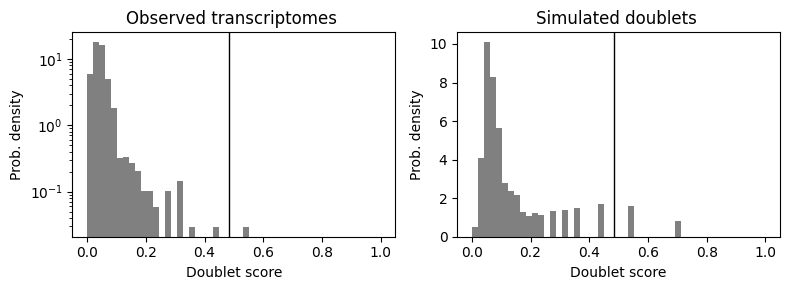

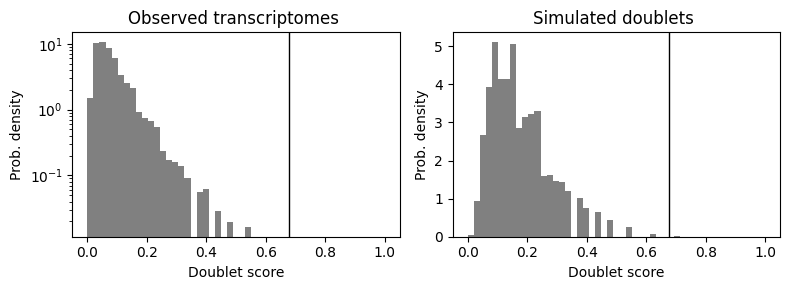

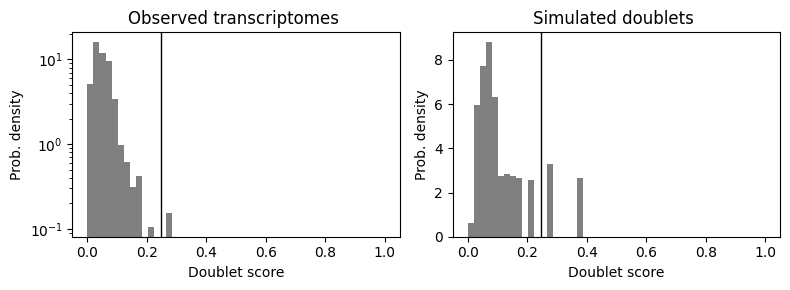

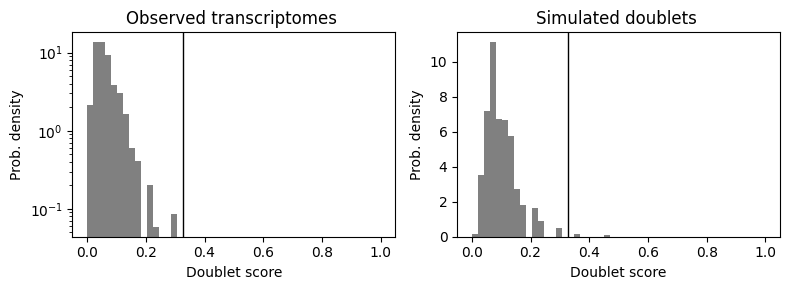

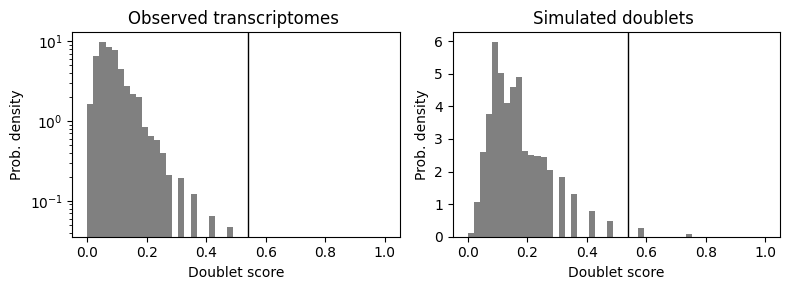

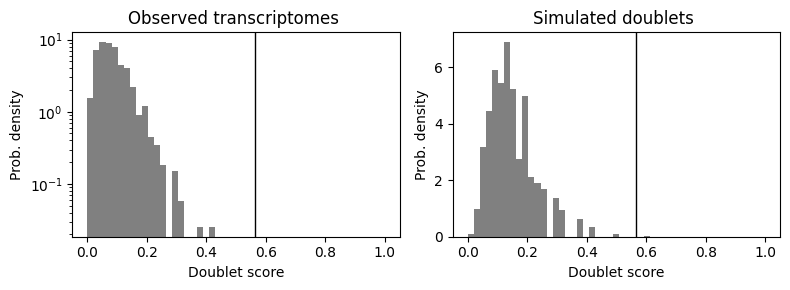

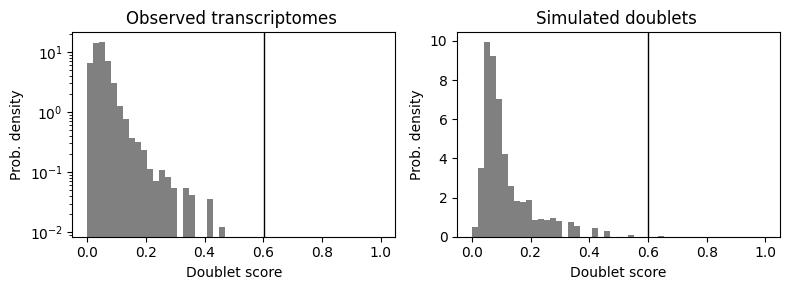

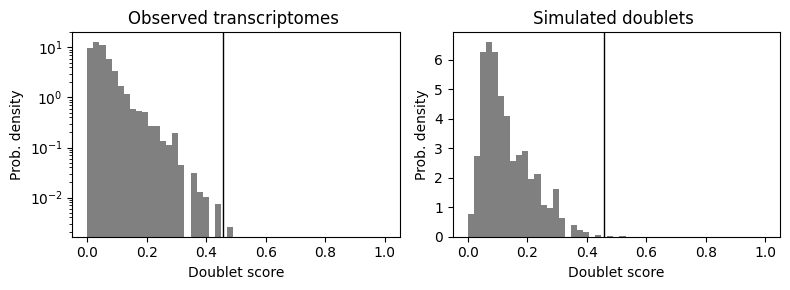

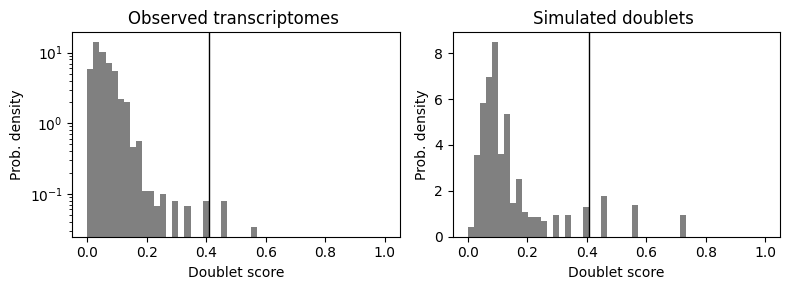

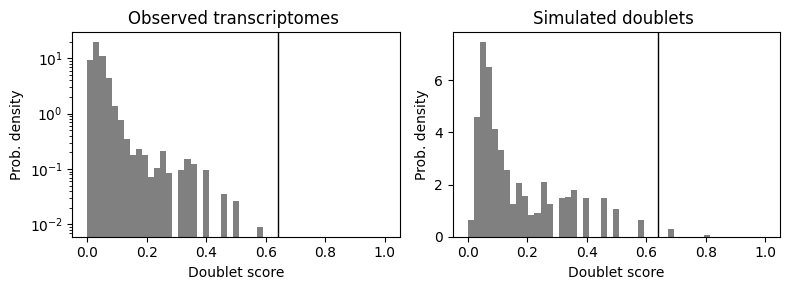

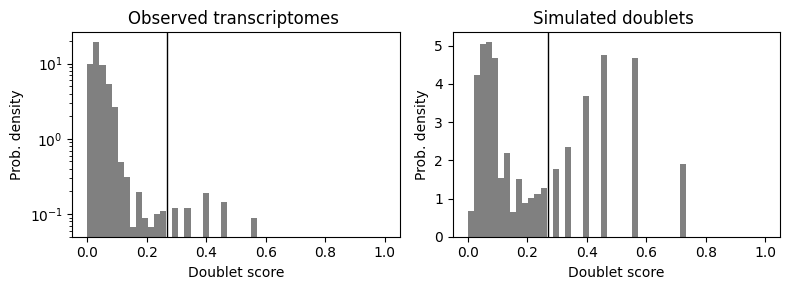

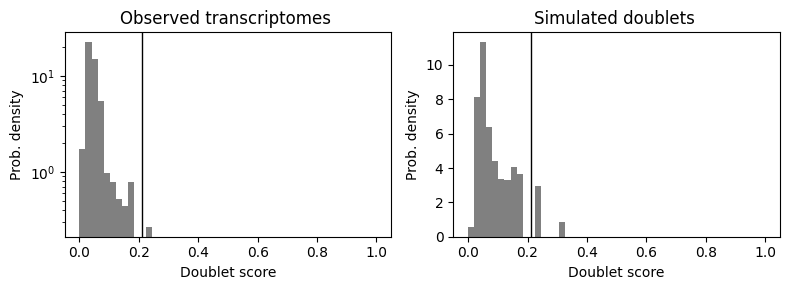

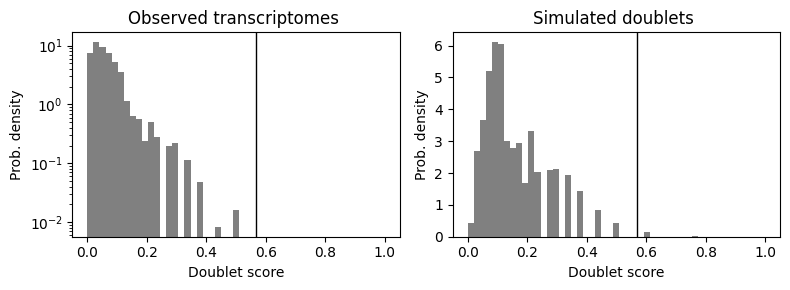

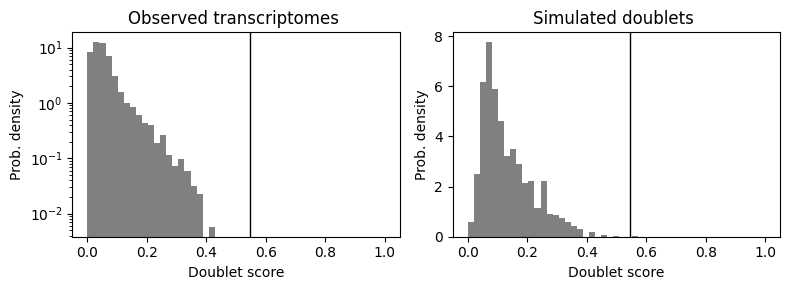

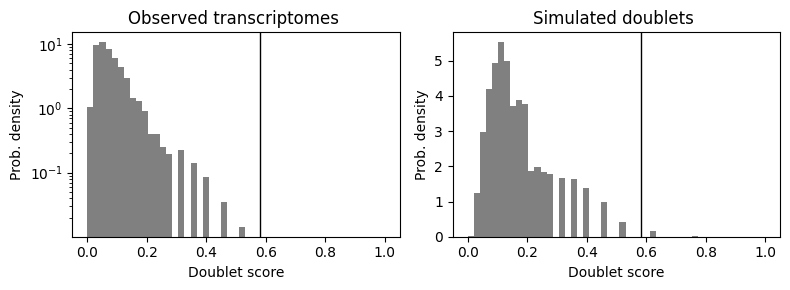

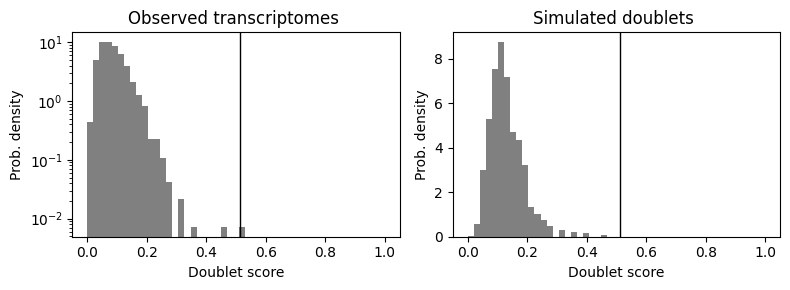

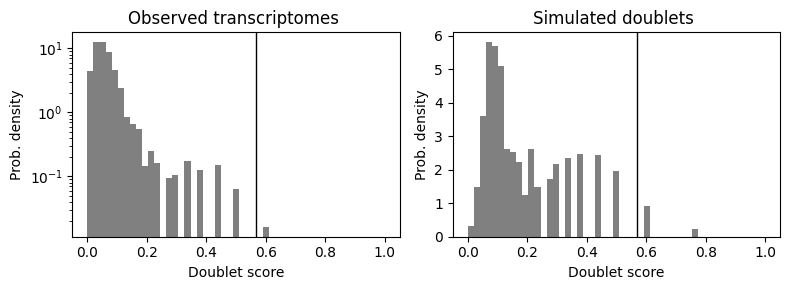

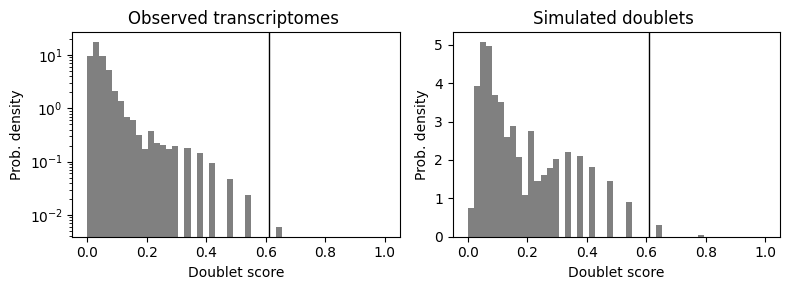

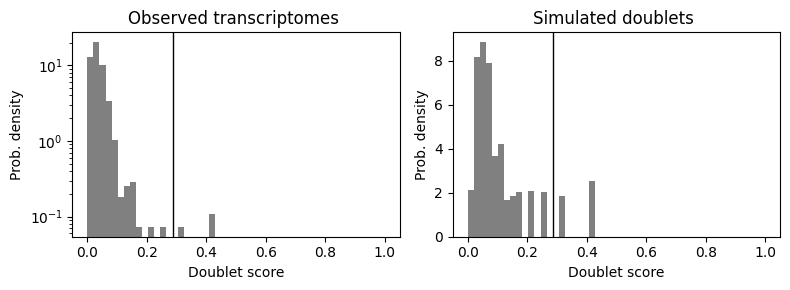

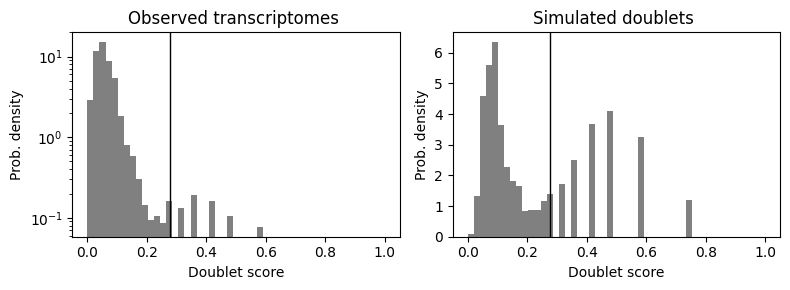

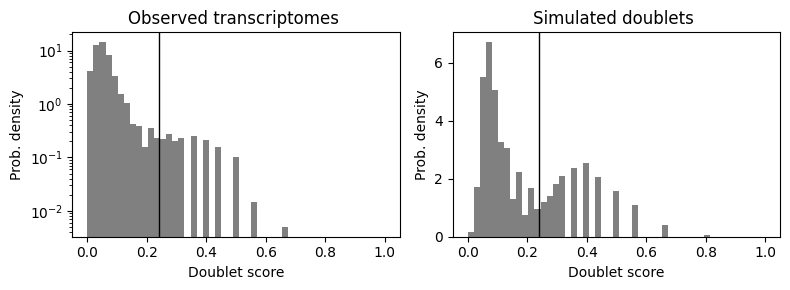

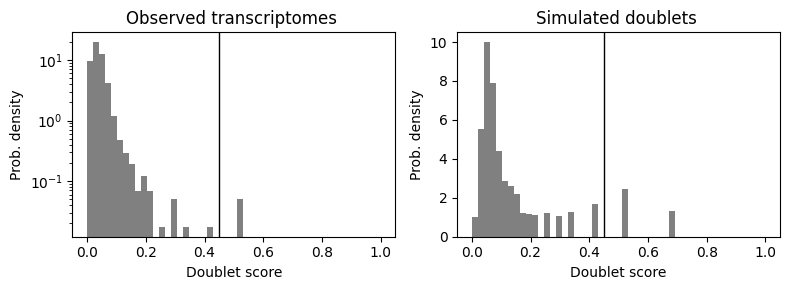

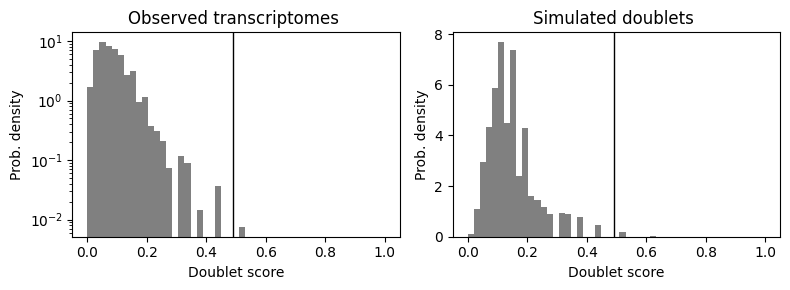

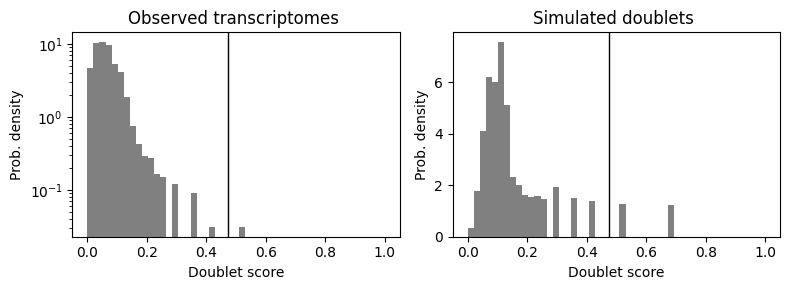

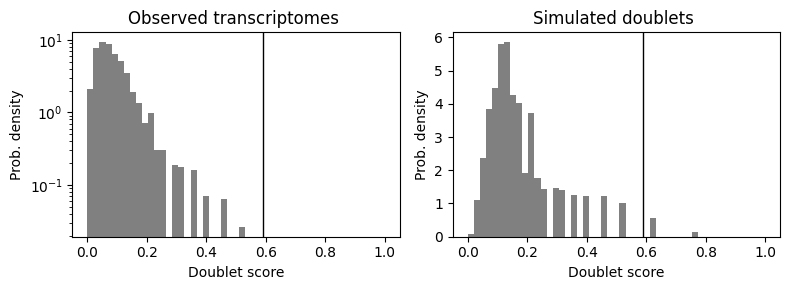

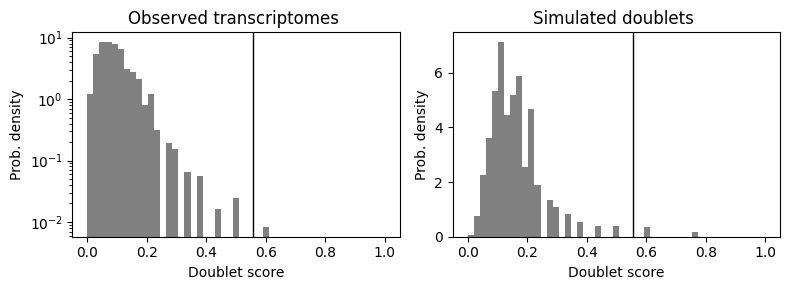

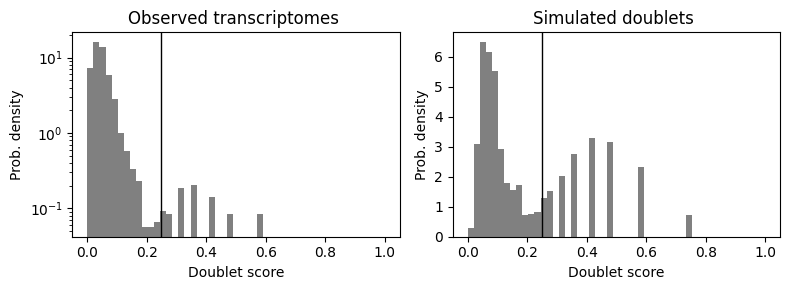

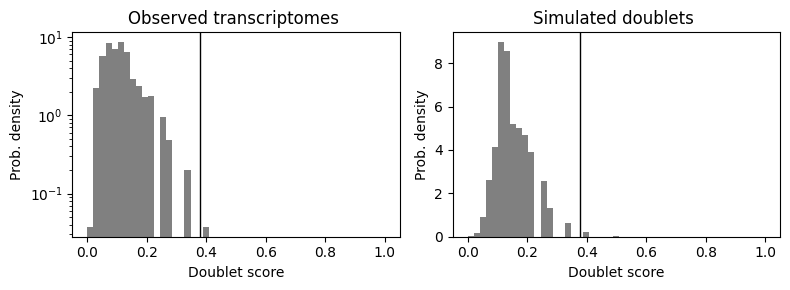

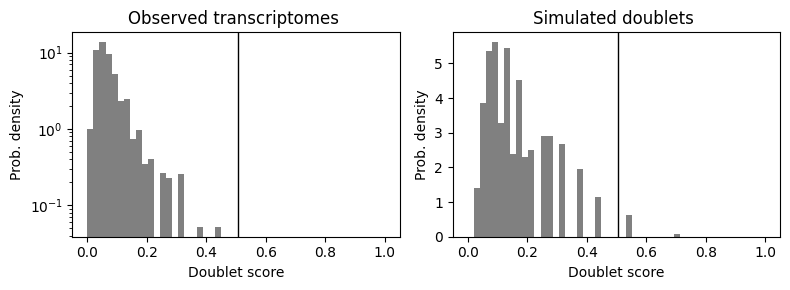

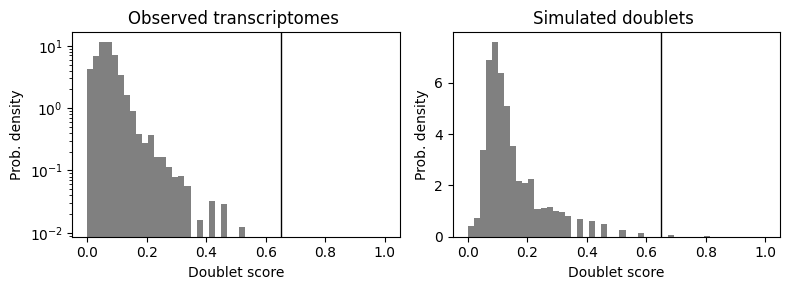

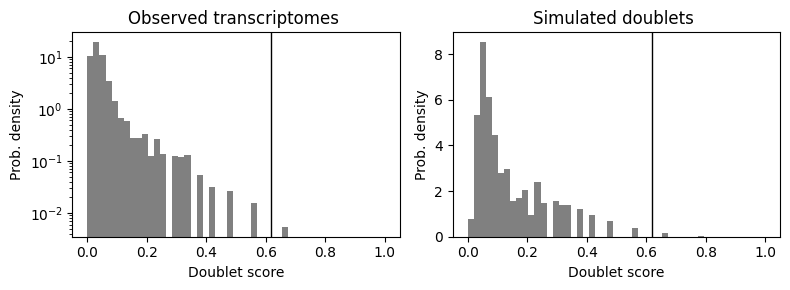

In [47]:
for ad in adata_dict.values():

    sc.pl.scrublet_score_distribution(ad)

In [48]:
n_before_doublet = 0
for ad in adata_dict.values():
    n_before_doublet += len(ad.obs_names)
print(n_before_doublet)

207973


In [49]:
for key,ad in adata_dict.items():
    new_ad = ad[ad.obs["doublet_score"] < 0.25].copy()
    adata_dict[key] = new_ad

In [50]:
n_after_doublet = 0
for ad in adata_dict.values():
    n_after_doublet += len(ad.obs_names)

In [51]:
print(f'{n_before_doublet - n_after_doublet} doubletes detected and removed')

2967 doubletes detected and removed


# Integrate into a single object

In [52]:
adata_list = list(adata_dict.values())
keys = list(adata_dict.keys())

print(adata_list)
print(keys)

[AnnData object with n_obs × n_vars = 3378 × 15918
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells'
    uns: 'scrublet', AnnData object with n_obs × n_vars = 14793 × 17452
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'lo

In [54]:
import anndata as ad
print(ad.__version__)

0.11.3


In [55]:
adata = ad.concat(
            adata_list, 
            join='outer', # includes all genes (obs)
            fill_value=0, # if the gene do not appear it is filled with 0
            label='batch', 
            merge='unique',# make obs / vars unique to prevent conflicss
            keys = keys, 
            index_unique='-')

In [56]:
adata

AnnData object with n_obs × n_vars = 205006 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet'

# HVG selection

As we're using seurat_v3 we perform HVG selection before normalization. 
For flavor='seurat_v3', genes are first sorted by the median (across batches) rank, with ties broken by the number of batches a gene is a HVG.
This hvg configuration, seurat_v3 and batch key = none mimics Seurat’s FindVariableFeatures(..., method='vst')

In [39]:
# !pip install --user scikit-misc # required for scanpy seruat_v3

  Using cached scikit_misc-0.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
Using cached scikit_misc-0.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (188 kB)


In [57]:
sc.pp.highly_variable_genes(adata, n_top_genes = 3000,
                         flavor='seurat_v3', # seurat_v3 expect counts
                         subset=False)

In [58]:
adata

AnnData object with n_obs × n_vars = 205006 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

# Data Normalization

In [59]:
adata.layers['counts'] = adata.X.copy() # save unnormalized (but gene filtered) counts in counts layer
sc.pp.normalize_total(adata, target_sum = 10000)
sc.pp.log1p(adata)   

In [60]:
adata.write_h5ad('adata_post_qc.h5ad')

... storing 'subtype' as categorical


In [2]:
import scanpy as sc
adata = sc.read_h5ad('/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/01_Preprocessing/adata_post_qc.h5ad')

In [3]:
adata.X.toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.0671015,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.2372675,
        0.       ],
       [2.5359092, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [4]:
adata.layers['counts'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
adata

AnnData object with n_obs × n_vars = 205006 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    layers: 'counts'